# Audio file to text and calculation of sentiment of that audio file

In [27]:
import speech_recognition as sr

In [34]:
    
    sound = "/home/neethu/Desktop/10.wav"
    r = sr.Recognizer()
    with sr.AudioFile(sound) as source:
        r.adjust_for_ambient_noise(source)
        print("converting audio file to text")
        audio = r.listen(source)
    try:
        print("converted audio is: \n"+ r.recognize_google(audio))
    except Exception as e:
        print(e)

      

converting audio file to text
converted audio is: 
thank you for your great help


In [35]:
record_all = []
record_all.append(r.recognize_google(audio))
print(record_all)

['thank you for your great help']


In [36]:
from textblob import TextBlob

In [37]:
def get_sentiment(sentx):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [40]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for recd_sent in record_all:
    sentiment = get_sentiment(recd_sent)
    print (sentiment,':',recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
print(sentimets_total)

positive : thank you for your great help
{'neutral': 0, 'positive': 1, 'negative': 0}


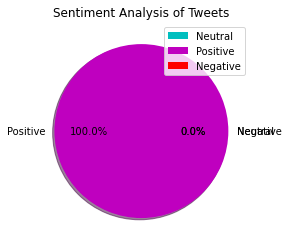

In [39]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Tweets')
plt.legend()
plt.show()